In [462]:
import pandas as pd
import numpy as np
import scipy


colleges = pd.read_csv('/Users/Daniel/Desktop/public_emissions.csv')


colleges["Total Emissions"] = colleges.sum(axis=1)

colleges["Undergraduate Enrollment 18/19"] = [x.replace(',',"") for x in colleges["Undergraduate Enrollment 18/19"]]
colleges["Undergraduate Enrollment 18/19"] = pd.to_numeric(colleges["Undergraduate Enrollment 18/19"])
colleges_nona = colleges.dropna()
colleges_nona










                    

,College,2014 Emissions,2015 Emissions,2016 Emissions,2017 Emissions,2018 Emissions,2019 Emissions,Undergraduate Enrollment 18/19,Public,Total Emissions
0,University of Michigan,683.8470,682.965,641.931,643.932,630.405,645.4850,30079,True,3929.5650
1,University of Virginia,293.2350,282.030,282.710,274.250,282.210,245.0000,16405,True,1660.4350
2,UCLA,304.0000,304.000,303.000,303.000,294.000,293.0000,31568,True,1802.0000
3,UC Berkeley,155.0000,189.000,174.000,176.000,184.882,188.4220,30845,True,1068.3040
4,UNC,535.0000,530.000,500.000,499.000,489.524,477.4370,18946,True,3031.9610
7,Georgia Tech,313.0930,300.000,288.207,281.600,240.461,255.1900,15964,True,1679.5510
12,UT Austin,900.0000,940.000,1000.000,1020.000,1076.486,1080.0000,40163,True,6017.4860
15,UI Urbana-Champaign,452.9600,426.652,425.015,413.107,433.751,422.7970,34120,True,2575.2820
16,Ohio State,648.3970,689.346,629.722,626.640,623.558,596.2710,46818,True,3814.9340
22,Penn State,518.4750,489.970,461.284,435.465,429.557,430.6830,40639,True,2766.4340


In [435]:
def get_year_least_nans(df):
    nans = []
    for column in df.iloc[:,1:7]:
        nan = colleges[column].isna().sum()
        nans.append(nan)
    na_byyear = count_na(colleges)
    least_val = min(na_byyear)
    least_index = na_byyear.index(least_val) + 1

    return colleges.iloc[:,[0,least_index,7,8]].dropna()
    

colleges_most = get_year_least_nans(colleges)
year_most = colleges_most.iloc[:,1].name



No handles with labels found to put in legend.


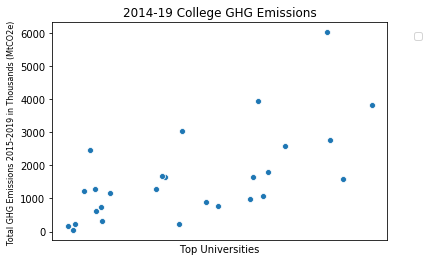

In [443]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.cubehelix_palette(n_colors=2, as_cmap=False)

plot = sns.scatterplot(x=colleges_nona["Undergraduate Enrollment 18/19"],y=colleges_nona['Total Emissions'])
plot.axes.xaxis.set_ticks([])
plt.xlabel('Top Universities')
plt.ylabel('Total GHG Emissions 2015-2019 in Thousands (MtCO2e) ', fontsize=8)
plt.title('2014-19 College GHG Emissions')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)

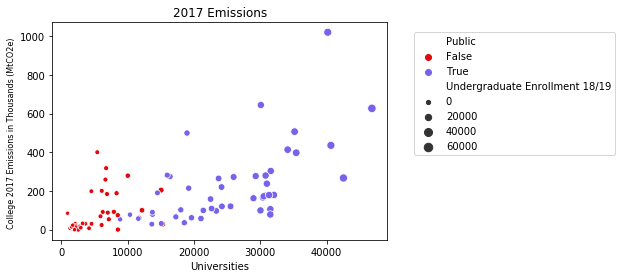

In [444]:

plot = sns.scatterplot(x=colleges_most["Undergraduate Enrollment 18/19"],y=colleges_most.iloc[:,1], size=colleges_most["Undergraduate Enrollment 18/19"], hue=colleges_most['Public'], palette=['#e0080c','#7663eb'])
plt.xlabel('Universities')
plt.ylabel(f'College {year_most} in Thousands (MtCO2e) ', fontsize=8)
plt.title(f'{year_most}')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1)


### Linear Regression






In [620]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn import linear_model
from sklearn.ensemble import IsolationForest
from scipy.stats import skew, kurtosis, skewtest, kurtosistest

In [623]:
skew_2017 = skew(colleges_most['2017 Emissions'])
kurtosis_2017 = kurtosis(colleges_most['2017 Emissions'])
kurtosis_enrollment = kurtosis(colleges_most["Undergraduate Enrollment 18/19"])

skew_enrollment, skew_2017, kurtosis_enrollment, kurtosis_2017

skewtest(colleges_most['2017 Emissions']), skewtest(colleges_most["Undergraduate Enrollment 18/19"])


(SkewtestResult(statistic=6.04445686067535, pvalue=1.4991415758904448e-09),
 SkewtestResult(statistic=1.9997399683203132, pvalue=0.045528349922086))

In [668]:
from scipy import stats
emissions = colleges_most[['Undergraduate Enrollment 18/19','2017 Emissions']]

z_scores = stats.zscore(emissions)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
emissions = emissions[filtered_entries]



X = emissions[['Undergraduate Enrollment 18/19']]
y = emissions[["2017 Emissions"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

([<matplotlib.lines.Line2D at 0x7fdf71017dd0>], 0.3761198011232221)

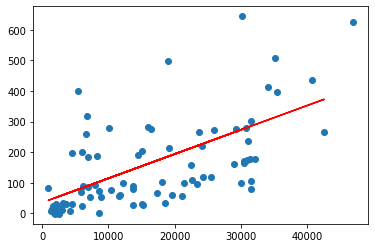

In [673]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

intercept = regressor.intercept_[0]
coefficient = regressor.coef_[0][0]


intercept, coefficient


y_pred = regressor.predict(X_test)


r2_score(y_test, y_pred)

plt.scatter(X,y)
plt.plot(X_test, y_pred,color='r'), r2_score(y_test, y_pred)
